<a href="https://colab.research.google.com/github/priyanka0591/Practise/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

In [ ]:
ROOT_DIR = "/content/gdrive/MyDrive/brain tumor detection deep learning/dataset_brain_tumor"
total_images = {}

for dir in os.listdir(ROOT_DIR):
  total_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

total_images

{'no_tumor': 550, 'tumor': 2784}

In [ ]:
data = []
result = []
for dir in os.listdir(ROOT_DIR):
  for img in os.listdir(os.path.join(ROOT_DIR, dir)):
    image = Image.open(os.path.join(os.path.join(ROOT_DIR, dir),img))
    image = image.resize((128, 128))
    image = np.array(image)
    data.append(image)
    if(dir == "tumor"):
      result.append([1])
    else :
      result.append([0])

    # image.save(os.path.join(os.path.join(ROOT_DIR, dir),img))

In [ ]:
data = np.array(data)
data.shape  

(3334, 128, 128, 3)

In [ ]:
result = np.array(result)
print(result)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
x_htrain = x_train;
y_htrain = y_train;

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["No tumor", "tumor"]

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize = (4,4))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

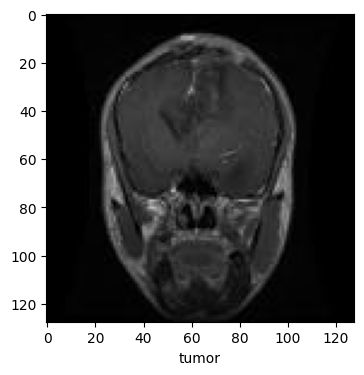

In [ ]:
plot_sample(x_train, y_train, 0)

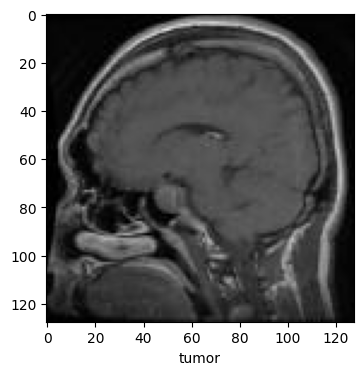

In [ ]:
plot_sample(x_train, y_train, 6)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
annmodel = models.Sequential([
        layers.Flatten(input_shape=(128,128,3)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1, activation='sigmoid')    
    ])

In [ ]:
annmodel.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
annHistory = annmodel.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
84/84 [==============================] - 7s 21ms/step - loss: 0.4774 - accuracy: 0.8369 - val_loss: 0.4447 - val_accuracy: 0.8321
Epoch 2/10
84/84 [==============================] - 1s 18ms/step - loss: 0.4143 - accuracy: 0.8436 - val_loss: 0.4666 - val_accuracy: 0.8966
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 0.3627 - accuracy: 0.8586 - val_loss: 0.4032 - val_accuracy: 0.8366
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: 0.3017 - accuracy: 0.8838 - val_loss: 0.2901 - val_accuracy: 0.8981
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 0.2615 - accuracy: 0.9100 - val_loss: 0.3920 - val_accuracy: 0.8471
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 0.2429 - accuracy: 0.9074 - val_loss: 0.3292 - val_accuracy: 0.8576
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 0.2138 - accuracy: 0.9171 - val_loss: 0.2364 - val_accuracy: 0.9190
Epoch 8/10
84

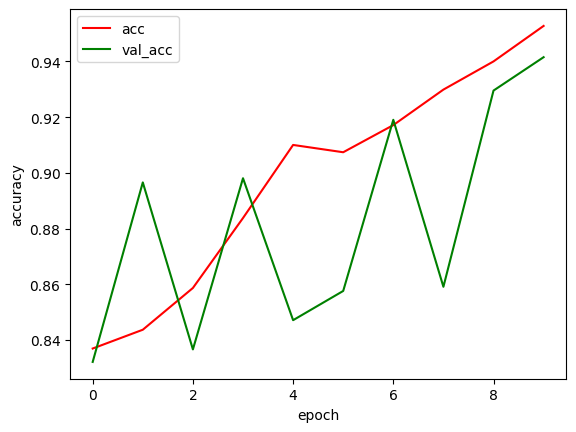

In [ ]:
plt.plot(annHistory.history['accuracy'],label='acc', color='red')
plt.plot(annHistory.history['val_accuracy'],label='val_acc', color='green')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

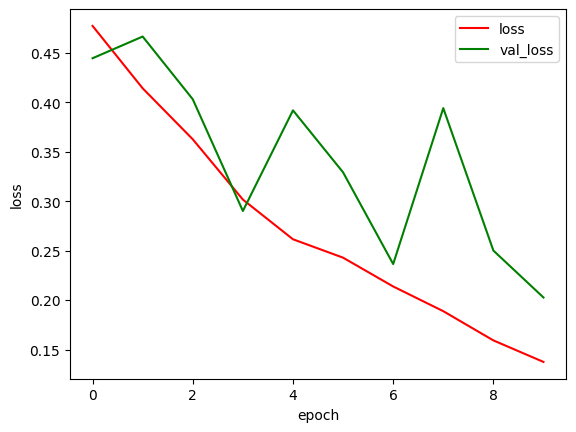

In [ ]:
plt.plot(annHistory.history['loss'],label='loss', color='red')
plt.plot(annHistory.history['val_loss'],label='val_loss', color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [ ]:
cnnmodel = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
   
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
cnnmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnnHistory=cnnmodel.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
84/84 [==============================] - 12s 31ms/step - loss: 0.3499 - accuracy: 0.8643 - val_loss: 0.2309 - val_accuracy: 0.9205
Epoch 2/10
84/84 [==============================] - 2s 18ms/step - loss: 0.1702 - accuracy: 0.9288 - val_loss: 0.1716 - val_accuracy: 0.9490
Epoch 3/10
84/84 [==============================] - 1s 18ms/step - loss: 0.0846 - accuracy: 0.9711 - val_loss: 0.1432 - val_accuracy: 0.9580
Epoch 4/10
84/84 [==============================] - 1s 18ms/step - loss: 0.0558 - accuracy: 0.9779 - val_loss: 0.1386 - val_accuracy: 0.9520
Epoch 5/10
84/84 [==============================] - 1s 18ms/step - loss: 0.0273 - accuracy: 0.9925 - val_loss: 0.2141 - val_accuracy: 0.9550
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.2095 - val_accuracy: 0.9640
Epoch 7/10
84/84 [==============================] - 1s 18ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 0.2384 - val_accuracy: 0.9640
Epoch 8/10
8

In [ ]:
cnnmodel.evaluate(x_test,y_test)

21/21 [==============================] - 0s 8ms/step - loss: 0.2801 - accuracy: 0.9580


[0.28011229634284973, 0.9580209851264954]

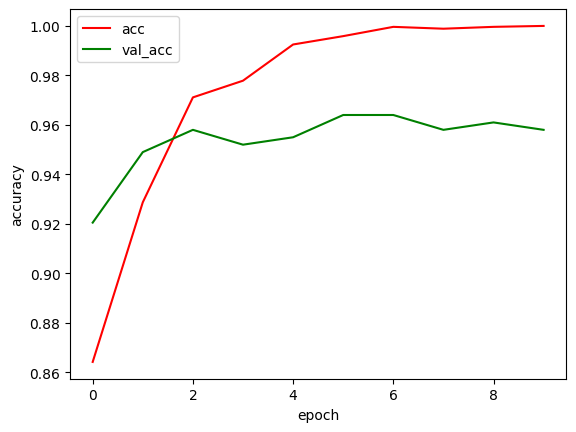

In [ ]:
plt.plot(cnnHistory.history['accuracy'],label='acc', color='red')
plt.plot(cnnHistory.history['val_accuracy'],label='val_acc', color='green')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

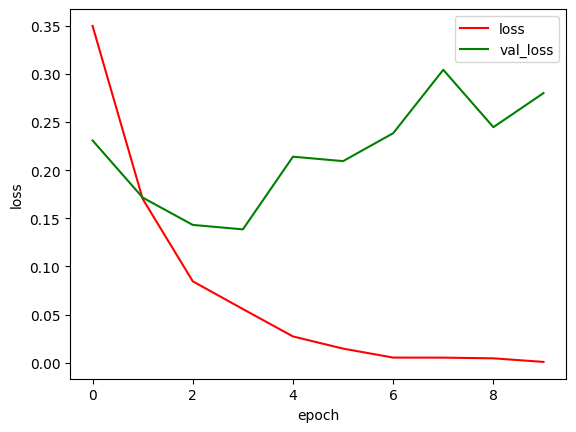

In [ ]:
plt.plot(cnnHistory.history['loss'],label='loss', color='red')
plt.plot(cnnHistory.history['val_loss'],label='val_loss', color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [ ]:
def pred_fun(path):
  image = Image.open(path)
  image = image.resize((128, 128))
  image = np.array(image)
  plt.figure(figsize = (4,4))
  plt.imshow(image)
  image = np.expand_dims(image, axis=0)
  prediction = cnnmodel.predict(image)
  if(prediction[0][0] == 1):
    print("Patient has a tumor")
  else:
    print("Patient does not has a tumor")

In [ ]:
# pred_fun("/content/drive/MyDrive/brain tumor detection deep learning/dataset_brain_tumor/no_tumor/notumor (124).jpg")

In [ ]:
# pred_fun("/content/drive/MyDrive/brain tumor detection deep learning/dataset_brain_tumor/tumor/tumor (1021).jpg")

In [ ]:
x_htrain.reshape(-1, );
y_htrain.reshape(-1, );


In [ ]:
param_grid = {'num_filters': [32, 64, 128],
              'kernel_size': [(3, 3), (5, 5)],
              'activation': ['relu', 'sigmoid']}

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(cnnmodel, param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy')

random_search.fit(x_train, y_train)

print(random_search.best_params_)

TypeError: ignored

Priyanka

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# define your model architecture using the function create_model()
def create_model(num_filters, kernel_size, activation):
    model = models.Sequential([
        layers.Conv2D(filters=num_filters, kernel_size=kernel_size, activation=activation, input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=num_filters * 2, kernel_size=kernel_size, activation=activation),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(num_filters * 16, activation=activation),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

# wrap the Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the hyperparameters grid
param_grid = {'num_filters': [32, 64, 128],
              'kernel_size': [(3, 3), (5, 5)],
              'activation': ['relu', 'sigmoid']}

# perform hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy')
random_search.fit(x_train, y_train)
print(random_search.best_params_)

# train the model with best hyperparameters
best_model = create_model(num_filters=random_search.best_params_['num_filters'],
                          kernel_size=random_search.best_params_['kernel_size'],
                          activation=random_search.best_params_['activation'])
cnnHistory = best_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)
best_model.evaluate(x_test, y_test)

In [ ]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion' : ['gini', 'entropy'],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400,600]}
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = cnnmodel()
grid_search = GridSearchCV(
    grid_search, 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=784)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model
    

In [ ]:
%%time
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)